# Описание проекта
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План по выполнению проекта
1. Открыть файл с данными и изучить общую информацию
2. Подготовить данные
 1. Заменить названия столбцов (привести к нижнему регистру);
 2. Преобразовать данные в нужные типы;
 3. Обработать пропуски при необходимости;
 4. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Провести исследовательский анализ данных
 1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 2. Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 3. Взять данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
 5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
 6. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
 7. Соотнести выводы с продажами игр на других платформах.
 8. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Составить портрет пользователя каждого региона.
   Определить для пользователя каждого региона (NA, EU, JP):
  1. Самые популярные платформы (топ-5). 
  2. Самые популярные жанры (топ-5). 
  3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы
 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Общий вывод
 
# Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h2>Открыть файл с данными и изучить общую информацию</h2>

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
#Загрузка данных
data = pd.read_csv('/datasets/games.csv')
data.info()
forecast_year = 2017 #Прогнозируемый год

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
display(data.head())#первые 10 записей
data.describe()#сводная информация

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Выводы:**
1. Есть две записи без названия игры
2. Nan-значения в дате реализа
3. Не все игры подвергались оценке 
4. Не у всех записей есть возрастная категория ESRB, организация была основана в 1994 году
5. Типы данных не корректны в столбцах: User_Score, Year_of_Release
6. Формат оценки пользователей и критиков различен, нужно привести к одному

<h2>Подготовка данных</h2>

In [4]:
#Переименнуем столбцы
data = data.rename(columns={'Name':'game_name', 'Platform':'platform_name', 'Year_of_Release':'year_of_release',
                            'Name':'game_name','Genre':'genre_name','NA_sales':'na_sales_m','EU_sales':'eu_sales_m',
                            'JP_sales':'jp_sales_m', 'Other_sales':'other_sales_m','Critic_Score':'critic_score',
                            'User_Score':'user_score','Rating':'rating'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform_name      16715 non-null object
year_of_release    16446 non-null float64
genre_name         16713 non-null object
na_sales_m         16715 non-null float64
eu_sales_m         16715 non-null float64
jp_sales_m         16715 non-null float64
other_sales_m      16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data['user_score'].value_counts()#посмотрим на значения в столбце user_score

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.3       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [6]:
data['year_of_release'].value_counts()#посмотрим на значения в столбце year_of_release

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [7]:
data['user_score'] = data['user_score'].replace('tbd',0) #заменим на 0, для перевода в тип float
data['year_of_release'] = data['year_of_release'].fillna(0) #заменим пропуски на 0
data = data.astype({"user_score" : "float64", 'year_of_release' : 'int'}) #приведем типы данных к нужным нам
data['user_score'] = data['user_score'].apply(lambda x: x*10) #умножим на 10, чтоб оценка была в таком же виде,что и у критиков
data.info()#проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform_name      16715 non-null object
year_of_release    16715 non-null int64
genre_name         16713 non-null object
na_sales_m         16715 non-null float64
eu_sales_m         16715 non-null float64
jp_sales_m         16715 non-null float64
other_sales_m      16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
data['platform_name'].value_counts() #посмотрим на значения в столбце platform_name

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform_name, dtype: int64

In [9]:
data['genre_name'].value_counts() #посмотрим на значения в столбце genre_name

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre_name, dtype: int64

In [10]:
data['rating'].value_counts()#посмотрим на значения в столбце rating

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [11]:
data['rating'] = data['rating'].fillna('RP') #заменим Nan значения на "RP" - без рейтинга
data['rating'].value_counts()

RP      6769
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [12]:
data.dropna(subset = ['game_name'],inplace = True) #Пожертвуем двумя записями, для статистики - это не потеря
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform_name      16713 non-null object
year_of_release    16713 non-null int64
genre_name         16713 non-null object
na_sales_m         16713 non-null float64
eu_sales_m         16713 non-null float64
jp_sales_m         16713 non-null float64
other_sales_m      16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
#Суммарные продажи во всех регионах
data['total_sales_m'] = data['na_sales_m']+data['eu_sales_m']+data['jp_sales_m']+data['other_sales_m']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
game_name          16713 non-null object
platform_name      16713 non-null object
year_of_release    16713 non-null int64
genre_name         16713 non-null object
na_sales_m         16713 non-null float64
eu_sales_m         16713 non-null float64
jp_sales_m         16713 non-null float64
other_sales_m      16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             16713 non-null object
total_sales_m      16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


Данные стали "тяжелее" на 0.3 Мб)

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Количество выпущенных игр')

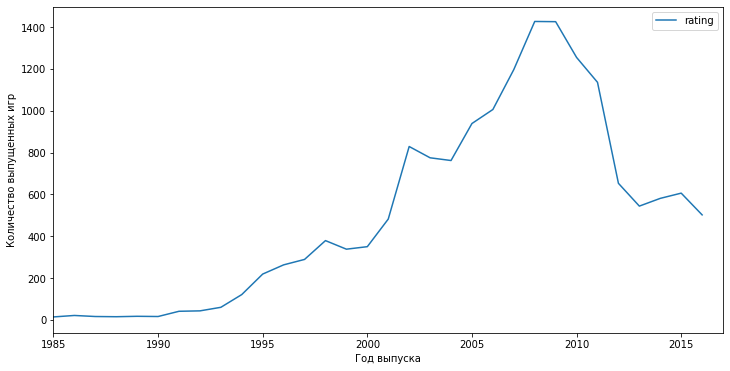

In [15]:
plt.figure(figsize=(12,6))
plt.xlim(1985,2017)
sns.lineplot(data=data.pivot_table(index='year_of_release', values = 'rating', aggfunc='count'))
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

По этим данным можно остледить прогресс в развитии технологий, кризисы в индустрии и открытие новых "полей"(Мобильные устройства, которые стоят не так дорого как новая PS4). Возможно провал в 2013 году связан с биткоинтом, был первый скачек, от сюда рост цен на видеокарты. Так же разработчики начали уходить от такой монетизации в сторону продажи внутриигровых товаров за реальные деньги.

### Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [16]:
platform_top = data.groupby(
    ['platform_name']).agg({'total_sales_m' : 'sum'}).sort_values(by = 'total_sales_m', ascending = False).head(10)#топ по продажам
top_stats = data.query('platform_name in @platform_top.index & year_of_release > 0')#выделяем только записи по топ платформам
top_stats.info()
display(top_stats.describe())
top_stats_years = top_stats.pivot_table(
    index=['platform_name','year_of_release'], values = 'total_sales_m'
).reset_index()
display(top_stats_years)
median_duration = top_stats_years.groupby('platform_name').agg({'year_of_release':'count'}).median()
mean_duration = top_stats_years.groupby('platform_name').agg({'year_of_release':'count'}).mean()

print('Срок "жизни" игровой консоли в среднем:', mean_duration)
print('Медиана "жизни" игровой консоли:', median_duration)
print('Даты выпуска:\n', top_stats_years.groupby('platform_name').agg({'year_of_release':'first'}).sort_values(by = 'year_of_release'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12615 entries, 0 to 16713
Data columns (total 12 columns):
game_name          12615 non-null object
platform_name      12615 non-null object
year_of_release    12615 non-null int64
genre_name         12615 non-null object
na_sales_m         12615 non-null float64
eu_sales_m         12615 non-null float64
jp_sales_m         12615 non-null float64
other_sales_m      12615 non-null float64
critic_score       6282 non-null float64
user_score         7979 non-null float64
rating             12615 non-null object
total_sales_m      12615 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.3+ MB


,year_of_release,na_sales_m,eu_sales_m,jp_sales_m,other_sales_m,critic_score,user_score,total_sales_m
count,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,6282.000000,7979.000000,12615.000000
mean,2007.141419,0.257960,0.159251,0.059524,0.055964,68.682267,52.585913,0.532698
std,4.570569,0.752134,0.547979,0.253301,0.210814,14.021987,33.557070,1.543152
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.060000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,70.000000,68.000000,0.170000
75%,2010.000000,0.240000,0.120000,0.030000,0.040000,79.000000,79.000000,0.470000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,97.000000,82.540000


,platform_name,year_of_release,total_sales_m
0,DS,1985,0.020000
1,DS,2004,0.750870
2,DS,2005,1.102881
3,DS,2006,0.596070
4,DS,2007,0.390798
...,...,...,...
112,X360,2012,0.940943
113,X360,2013,1.181067
114,X360,2014,0.551429
115,X360,2015,0.341714


Срок "жизни" игровой консоли в среднем: year_of_release    11.7
dtype: float64
Медиана "жизни" игровой консоли: year_of_release    11.0
dtype: float64
Даты выпуска:
                year_of_release
platform_name                 
DS                        1985
PC                        1985
PS                        1994
GBA                       2000
PS2                       2000
PSP                       2004
X360                      2005
PS3                       2006
Wii                       2006
PS4                       2013


Присутсвуют долгожители, такие как "PC", но эта патформа универсальна. Sony выпускают обновленную платформу каждые 6 лет. Nintendo так же выпускают разные платформы примерно раз в 6 лет, первая запись от них в 1985 году(DS), хотя в википедии дата выпуска первой модели в 2004 году. Хоть и выходит новая платформа, продажи для прошлых моделей продолжаются. Продажи длятся для каждой платформы - 11 лет, судя по медиане.

Text(0, 0.5, 'Продажи, м.')

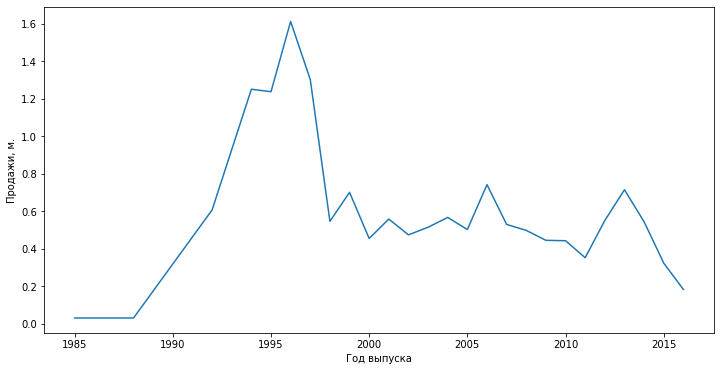

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=top_stats_years, x = 'year_of_release', y = 'total_sales_m',ci=None)
plt.xlabel("Год выпуска")
plt.ylabel("Продажи, м.")

### Взять данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [18]:
#Посмотрим данные за отчетный период в 6.5 лет
condition = int(forecast_year - (median_duration/2))
data['relevance'] = data['year_of_release'] > condition 
actual_data = data.query('relevance == True').copy(deep=True)
actual_data

,game_name,platform_name,year_of_release,genre_name,na_sales_m,eu_sales_m,jp_sales_m,other_sales_m,critic_score,user_score,rating,total_sales_m,relevance
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05,True
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27,True
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63,True
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60,True
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,True
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,True
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,True
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,True


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Так как весь рынок продаж компьютерных игр в упадке, то продажи на всех платформах падают.
Посчитаем отталкиваясь от доли рынка занимаемой платформой.

In [19]:
sum_total_sales_m = actual_data.groupby('year_of_release').agg({'total_sales_m':'sum'}) #оборот за периоды
actual_data = actual_data.merge(sum_total_sales_m, on='year_of_release')#склеиваем с основной таблицей
actual_data['market_share_year'] = actual_data['total_sales_m_x'] / actual_data['total_sales_m_y']#рассчитываем долю за год каждой записи
actual_data

,game_name,platform_name,year_of_release,genre_name,na_sales_m,eu_sales_m,jp_sales_m,other_sales_m,critic_score,user_score,rating,total_sales_m_x,relevance,total_sales_m_y,market_share_year
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05,True,361.24,0.058272
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27,True,361.24,0.045039
2,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60,True,361.24,0.040416
3,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,26.0,M,10.24,True,361.24,0.028347
4,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,26.0,M,9.36,True,361.24,0.025911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,True,129.94,0.000077
2882,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,True,129.94,0.000077
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,True,129.94,0.000077
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01,True,129.94,0.000077


In [20]:
top_actual_data = actual_data.groupby(
    ['platform_name','year_of_release']).agg({'market_share_year':'sum','total_sales_m_x' :'sum'}).rename(
    columns={'total_sales_m_x':'total_sales'}).reset_index()
top_actual_data = top_actual_data[(top_actual_data['platform_name']!='DS')&((top_actual_data['platform_name']!='PSP'))]
top_actual_data

,platform_name,year_of_release,market_share_year,total_sales
0,3DS,2012,0.144335,51.36
1,3DS,2013,0.156599,56.57
2,3DS,2014,0.131994,43.76
3,3DS,2015,0.103664,27.78
4,3DS,2016,0.116515,15.14
7,PC,2012,0.065254,23.22
8,PC,2013,0.034271,12.38
9,PC,2014,0.040057,13.28
10,PC,2015,0.031793,8.52
11,PC,2016,0.040403,5.25


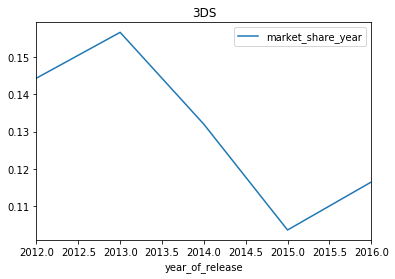

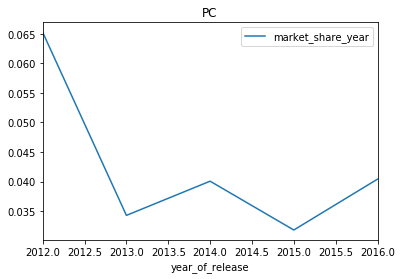

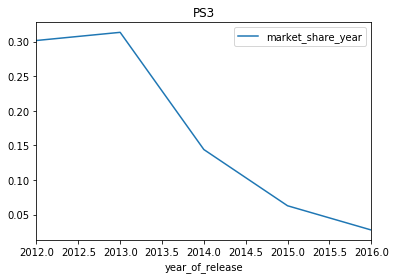

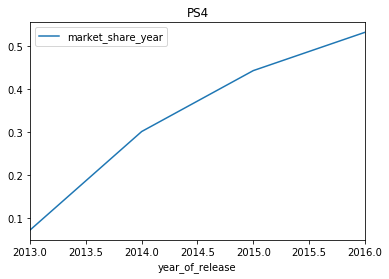

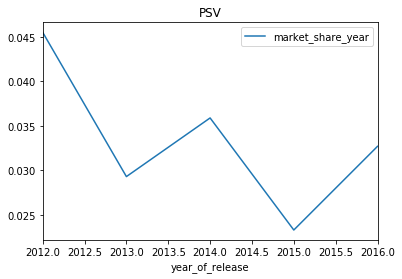

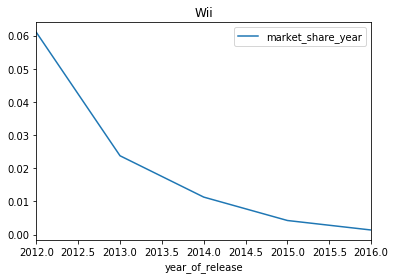

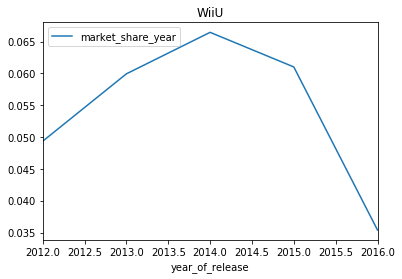

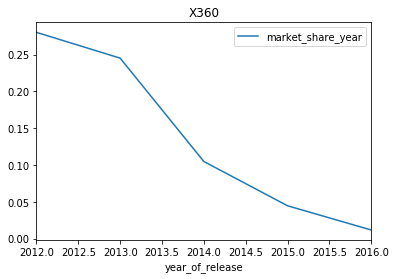

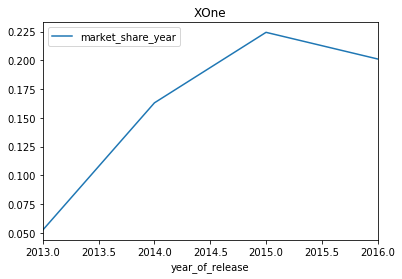

Потенциально прибыльные платформы: ['PS4', 'XOne']


In [21]:
promising_platforms = []
for i in top_actual_data['platform_name'].unique():
    max_year_sales = top_actual_data[(top_actual_data['platform_name'] == i)&(top_actual_data['year_of_release'] == forecast_year-1)]['market_share_year'].sum()
    max_penultimate_sales = top_actual_data[(top_actual_data['platform_name'] == i)&(top_actual_data['year_of_release'] < forecast_year-1)]['market_share_year'].mean()
    top_actual_data[top_actual_data['platform_name'] == i].pivot_table(
        index = 'year_of_release',values='market_share_year').plot(title = i)
    plt.show()
    if max_year_sales.sum() >= max_penultimate_sales:
        promising_platforms.append(i)
print('Потенциально прибыльные платформы:',promising_platforms)

### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Глобальные продажи')

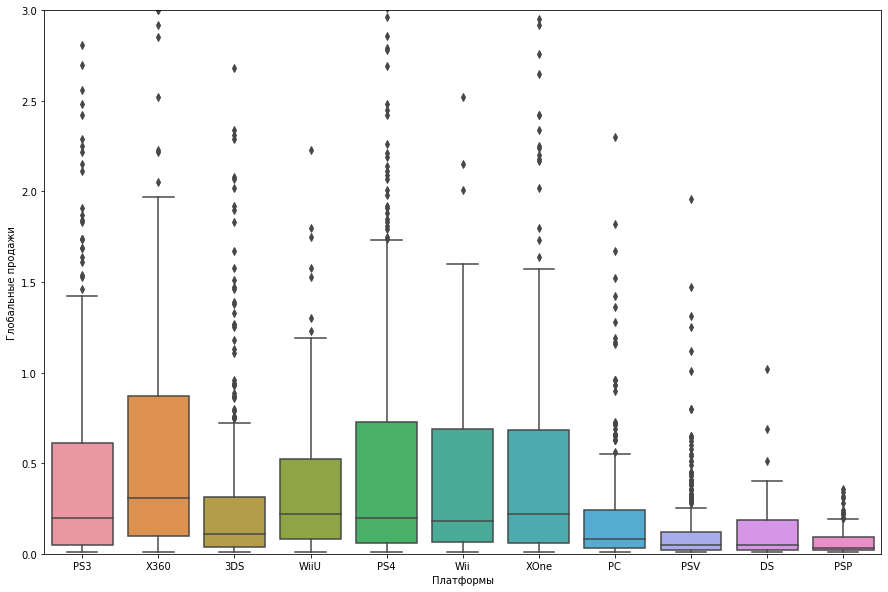

In [22]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(data=actual_data, x='platform_name', y='total_sales_m_x')
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи')

Выбросов не много, это экслюзивы на платформах или хиты. У популярных платформ медиана практически на одном уровне, это говорит о том,что обычно платформы ведущие произовдители выпускают в одно время, игры выпускают на всех популярных платформах, а поклонников примерно одинаково.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

In [23]:
platform_PS4 = actual_data[actual_data['platform_name']=='PS4'][['critic_score','user_score','total_sales_m_x']]
platform_PS4.corrwith(platform_PS4['total_sales_m_x'])

critic_score       0.406568
user_score         0.023279
total_sales_m_x    1.000000
dtype: float64

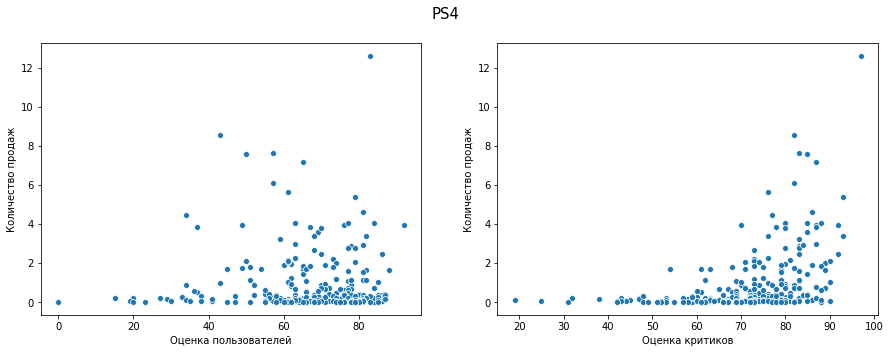

In [24]:
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
sns.scatterplot(x='user_score', y='total_sales_m_x', data=platform_PS4, ax=ax[0])
sns.scatterplot(x='critic_score', y='total_sales_m_x', data=platform_PS4, ax=ax[1])
fig.suptitle('PS4', fontsize=15)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()

В целом оценка пользователей практически никак не влияет на продажи, больше верят критикам. Но даже мнение критиков не сильно влияют на продажи. Мнение пользователей более субъективно.

### Соотнести выводы с продажами игр на других платформах.

critic_score       0.284773
user_score         0.104126
total_sales_m_x    1.000000
dtype: float64


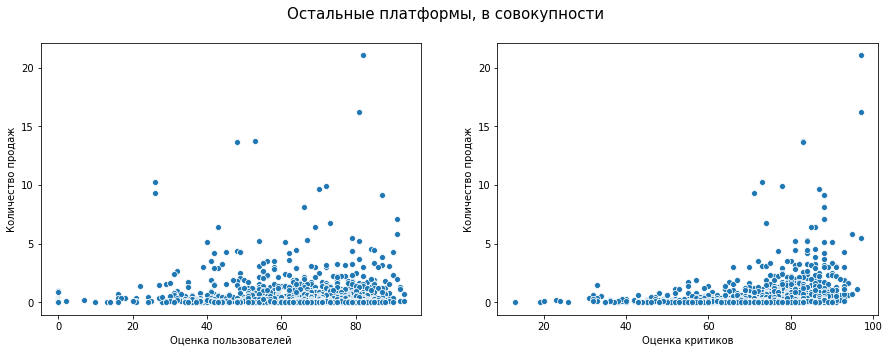

In [25]:
platform_not_PS4 = actual_data[actual_data['platform_name']!='PS4'][['critic_score','user_score','total_sales_m_x']]
print(platform_not_PS4.corrwith(platform_not_PS4['total_sales_m_x']))
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
sns.scatterplot(x='user_score', y='total_sales_m_x', data=platform_not_PS4, ax=ax[0])
sns.scatterplot(x='critic_score', y='total_sales_m_x', data=platform_not_PS4, ax=ax[1])
fig.suptitle('Остальные платформы, в совокупности', fontsize=15)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()

Можно сказать, что количество выборок выросло, данные усреднились. Все еще критики больше влияют на продажи, чем оценки пользователей.

### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [26]:
genre_top = actual_data.groupby(
    ['genre_name']).agg({'game_name':'count','total_sales_m_x' :'sum'}).rename(
    columns={'game_name':'count_game','total_sales_m_x':'total_sales'}).reset_index()
genre_top.sort_values(by='count_game', ascending = False)

,genre_name,count_game,total_sales
0,Action,1031,441.12
7,Role-Playing,370,192.80
1,Adventure,302,29.43
10,Sports,268,181.07
8,Shooter,235,304.73
3,Misc,192,85.04
6,Racing,115,53.50
2,Fighting,109,44.49
4,Platform,85,61.00
9,Simulation,80,35.12


In [27]:
genre_top.sort_values(by='total_sales', ascending = False)

,genre_name,count_game,total_sales
0,Action,1031,441.12
8,Shooter,235,304.73
7,Role-Playing,370,192.80
10,Sports,268,181.07
3,Misc,192,85.04
4,Platform,85,61.00
6,Racing,115,53.50
2,Fighting,109,44.49
9,Simulation,80,35.12
1,Adventure,302,29.43


In [28]:
genre_top.corrwith(genre_top['total_sales'])

count_game     0.853865
total_sales    1.000000
dtype: float64

Не удивительно,что сильная зависимость от кол-ва проданных копий. Игр в жанре Action больше всего и их покупают. Игр в жанре Adventure много, но они не так прибыльны. Role-Playing в соотношении кол-ва и заработанных денег занимает первое место.

In [29]:
genre_top_median = actual_data.groupby(
    ['genre_name']).agg({'game_name':'count','total_sales_m_x':'median'}).rename(
    columns={'game_name':'count_game','total_sales_m_x':'total_sales_median'}).reset_index()
genre_top_median.sort_values(by='total_sales_median', ascending = False)

,genre_name,count_game,total_sales_median
8,Shooter,235,0.440
10,Sports,268,0.240
4,Platform,85,0.210
7,Role-Playing,370,0.140
6,Racing,115,0.140
2,Fighting,109,0.130
0,Action,1031,0.120
3,Misc,192,0.120
9,Simulation,80,0.120
11,Strategy,71,0.080


## Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):

###  Самые популярные платформы (топ-5).

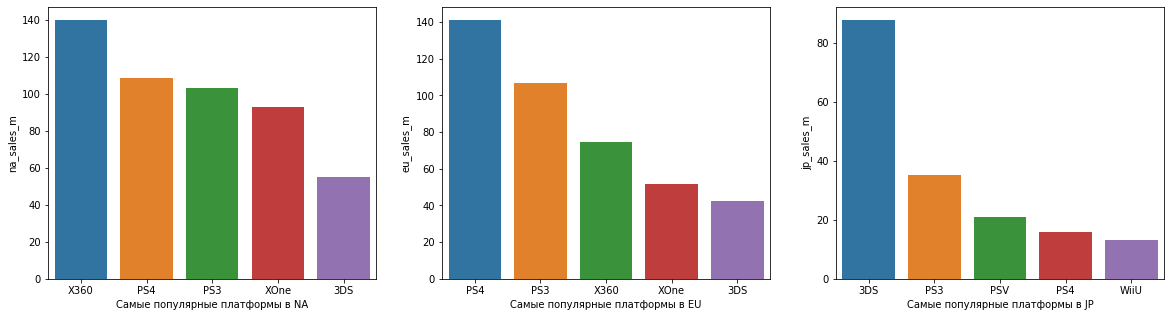

In [30]:
def view_hist(df, col, title):
    fig, axes = plt.subplots(1,3, figsize=(20,5))
    rows = ['na_sales_m','eu_sales_m','jp_sales_m']
    i_ax = 0
    for r in rows:
        dt = df.groupby([col]).agg({r:'sum'}).sort_values(by = r,ascending = False).head().reset_index()
        sns.barplot(data = dt, x = col, y = r, ax = axes[i_ax])
        i_ax+=1
    axes[0].set_xlabel(title + ' в NA')
    axes[1].set_xlabel(title + ' в EU')
    axes[2].set_xlabel(title + ' в JP')    
    plt.show()
    
view_hist(actual_data, 'platform_name', 'Самые популярные платформы')


В америке - Microsoft, в Европе - Sony, в Японии сильно доминирует Nintendo. 

### Самые популярные жанры (топ-5).

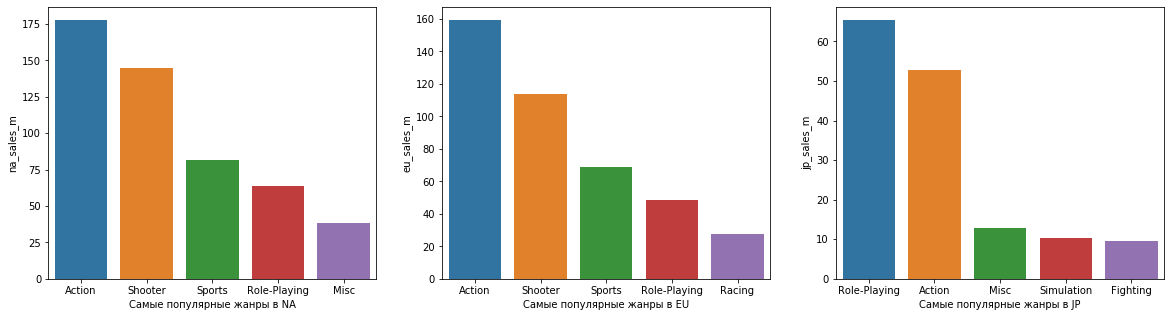

In [31]:
view_hist(actual_data, 'genre_name', 'Самые популярные жанры')

Вкусы в регионах NA и UA - практически идентичны. В Японии же самый поплуярный жанр - Role-Playing, дальше Action. Action во всех регионах является рентабельным жанром.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

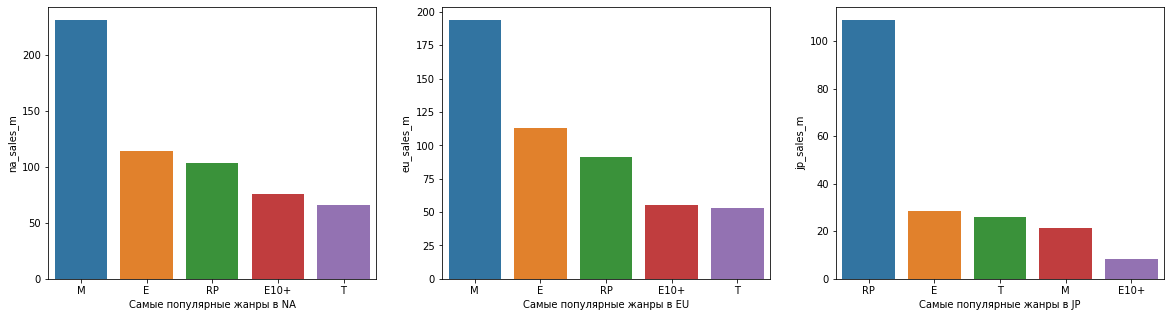

In [32]:
view_hist(actual_data, 'rating', 'Самые популярные жанры')

Опять же, регионы NA и EU очень похожи. График Японии возможно пострадал, из за пропущенных значений, которые мы перевели в RP, много игр произведеных Японскими разработчиками не выходят на другие рынки.

## Проверить гипотезы
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [33]:
def h0_test(df_1,df_2,hyp, alpha): #функция для проверки гипотезы
    result = st.ttest_ind(df_1,df_2)
    print('Нулевая гипотеза:',hyp)
    print('p-значение:', result.pvalue)
    if result.pvalue < alpha:
        return 'Отвергаем нулевую гипотезу'
    else:
        return 'Не получилось отвергнуть нулевую гипотезу'

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [34]:
hyp = 'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые'
alpha = 0.05
df_1 = actual_data[actual_data['platform_name'] == 'XOne']['user_score'].dropna()
df_2 = actual_data[actual_data['platform_name'] == 'PC']['user_score'].dropna()
h0_test(df_1,df_2,hyp,alpha)

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
p-значение: 0.5187355060176121


'Не получилось отвергнуть нулевую гипотезу'

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются

In [35]:
hyp = 'Средние пользовательские рейтинги жанров Action и Sports одинаковые'
df_1 = actual_data[actual_data['genre_name'] == 'Action']['user_score'].dropna()
df_2 = actual_data[actual_data['genre_name'] == 'Sports']['user_score'].dropna()
h0_test(df_1,df_2,hyp,alpha)

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
p-значение: 7.819142547903223e-12


'Отвергаем нулевую гипотезу'

Выводы по гипотезам:
Не удивительно,что не получилось отвергнуть первую гипотезу, одна и та же игра выпускается на разных платформах, геймплей редко как то различается. Оптимизация влияет на игру на определенной платформе, но не так сильно.
Вторая гипотеза отвергнута, Action - самый популярный жанр, играют все, от мала до велика. Жанр Sprot специфический, отзывы имеют субъективный характер 

## Общий вывод

Рынок, именно продаж, компьютерных игр в упадке. Разработчики находят другие способы монетизации: платные аккаунты, подписки и др. Стоит рассмотреть продажу доп.контента.

Японский сегмент, очень различается от двух других. Как по платформам, так и по жанрам. Восточная культура.